<a href="https://colab.research.google.com/github/adigup390/deepintocnn/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2021-06-05 17:25:22--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [2]:
import torch
from torchvision import datasets,transforms
import helper

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = True, transform  = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64,shuffle = True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download = True, train = False, transform  = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64,shuffle = True)


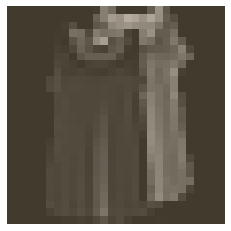

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

In [4]:
from torch import nn
model = nn.Sequential(nn.Linear(784,256),
                      nn.ReLU(),
                      nn.Linear(256,64),
                      nn.ReLU(),
                      nn.Linear(64,64),
                      nn.ReLU(),
                      nn.Linear(64,32),
                      nn.ReLU(),
                      nn.Linear(32,10),
                      nn.LogSoftmax(dim = 1))
print(model)


Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): ReLU()
  (8): Linear(in_features=32, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)


In [14]:
criterion = nn.NLLLoss()

from torch import optim
optimizer = optim.SGD(model.parameters(),lr = 0.015)


In [23]:
epochs = 5
for i in range(epochs):
    running_loss = 0
    for images,labels in iter(trainloader):
        optimizer.zero_grad()
        input = images.resize_(images.shape[0],784)
        output = model(input)
        loss = criterion(output,labels)
        running_loss+= loss
        loss.backward()
        optimizer.step()
    print(f"Loss = {running_loss}")

Loss = 0.33730244636535645
Loss = 0.3280937671661377
Loss = 0.3221174478530884
Loss = 0.3167419731616974
Loss = 0.311571329832077


In [24]:
correct = 0
total = 0
for image,label in testloader:
  input = image.resize_(image.shape[0],784)
  output = model(input)
  _, predicted = torch.max(output,dim = 1)
  #print(label.shape[0])
  total += output.shape[0]
  boolarr = predicted==label
  correct+= torch.sum(boolarr).item()
  #print(boolarr.shape)
  #print(correct)
print(total)
print(correct)
print(f"Accuracy = {correct/total*100}")

10000
8946
Accuracy = 89.46


In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [28]:
model_save_name = 'FashionMNISTclassifier.pt'
path = F"/content/gdrive/My Drive/{model_save_name}" 
torch.save(model.state_dict(), path)